In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pywt
import pywt.data
from skimage import io, img_as_float
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance

In [2]:
image = Image.open(r'D:\Ansh\Python\Internship\Pan_Images\aci_1_forged.jpg')

### Splitting the image into red, green, and blue parts


In [170]:
var = Image.Image.split(image)

In [4]:
var[0].show()
var[1].show()
var[2].show()

# Red

### Applying Wavelet Transform to obtain LL and HH subbands.

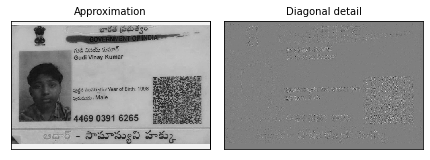

In [5]:
titles = ['Approximation', 'Diagonal detail']
coeffs2 = pywt.dwt2(var[0], 'db2')
LL_R, (LH_R, HL_R, HH_R) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL_R,HH_R]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

LL_R = LL_R.astype(np.uint8)
LL1_R = Image.fromarray(LL_R)
LL1_R.show()

HH_R = HH_R.astype(np.uint8)
HH1_R = Image.fromarray(HH_R)
HH1_R.show()

### Splitting the LL subband image into 16x16 blocks

In [167]:
hR, wR, = LL_R.shape

In [9]:
split_width = 16
split_height = 16

In [10]:
def start_points(size, split_size, overlap=0):
    points = [0]
    stride = int(split_size * (1-overlap))
    counter = 1
    while True:
        pt = stride * counter
        if pt + split_size >= size:
            points.append(size - split_size)
            break
        else:
            points.append(pt)
        counter += 1
    return points

X_points = start_points(wR, split_width, 0.5)
Y_points = start_points(hR, split_height, 0.5)

count = 0
name = 'splitted'
frmt = 'jpeg'
lR = [[0]*len(X_points)]*len(Y_points)
for n,i in enumerate(Y_points):
    for m,j in enumerate(X_points):
        split = LL_R[i:i+split_height, j:j+split_width]
        lR[n][m] = split
        


### Reshaping the array into a 1 dimensional one

In [11]:
lR = np.array(lR).reshape((40*62,16,16))

In [12]:
np.array(lR).shape

(2480, 16, 16)

### Flattening the pixels of the block

In [18]:
lR[0].flatten()

array([206, 206, 201, 202, 208, 205, 200, 199, 203, 198, 194, 181, 171,
       159, 160, 144, 213, 211, 205, 205, 210, 205, 204, 206, 207, 190,
       186, 178, 176, 167, 164, 151, 225, 223, 207, 193, 191, 194, 195,
       194, 191, 175, 170, 170, 173, 171, 167, 159, 234, 232, 218, 208,
       206, 214, 214, 207, 199, 195, 190, 195, 203, 192, 191, 191, 250,
       250, 250, 250, 250, 250, 250, 250, 250, 252, 252, 252, 252, 252,
       252, 252, 254, 254, 254, 254, 254, 254, 254, 254, 253, 252, 252,
       252, 252, 252, 252, 252, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254,
       254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 254, 25

In [19]:
lR_2 = []
for i in range(len(lR)):
    lR_2.append(lR[i].flatten()/255.0)

In [20]:
np.array(lR_2).shape


(2480, 256)

In [21]:
lR_2[0]

array([0.80784314, 0.80784314, 0.78823529, 0.79215686, 0.81568627,
       0.80392157, 0.78431373, 0.78039216, 0.79607843, 0.77647059,
       0.76078431, 0.70980392, 0.67058824, 0.62352941, 0.62745098,
       0.56470588, 0.83529412, 0.82745098, 0.80392157, 0.80392157,
       0.82352941, 0.80392157, 0.8       , 0.80784314, 0.81176471,
       0.74509804, 0.72941176, 0.69803922, 0.69019608, 0.65490196,
       0.64313725, 0.59215686, 0.88235294, 0.8745098 , 0.81176471,
       0.75686275, 0.74901961, 0.76078431, 0.76470588, 0.76078431,
       0.74901961, 0.68627451, 0.66666667, 0.66666667, 0.67843137,
       0.67058824, 0.65490196, 0.62352941, 0.91764706, 0.90980392,
       0.85490196, 0.81568627, 0.80784314, 0.83921569, 0.83921569,
       0.81176471, 0.78039216, 0.76470588, 0.74509804, 0.76470588,
       0.79607843, 0.75294118, 0.74901961, 0.74901961, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98823529, 0.98823

### Forming the euclidean distance array with the distances between adjacent blocks

In [22]:
dist = []
for i in range(len(lR_2)):
    if i+1<len(lR_2):
        dist.append([distance.euclidean(lR_2[i],lR_2[i+1]),((i),(i+1))])

In [23]:
dist

[[2.1423038043558695, (0, 1)],
 [2.563464351413699, (1, 2)],
 [1.5900304548549997, (2, 3)],
 [0.3283128261325661, (3, 4)],
 [0.21880103897354225, (4, 5)],
 [0.1782912615163812, (5, 6)],
 [0.2330613013035863, (6, 7)],
 [0.23486889681865172, (7, 8)],
 [0.15919829906027014, (8, 9)],
 [0.12131535920202367, (9, 10)],
 [0.17785945835997752, (10, 11)],
 [0.5188488722635282, (11, 12)],
 [0.7148343035327226, (12, 13)],
 [0.5488094835994866, (13, 14)],
 [0.29022257430711196, (14, 15)],
 [0.3503609387324243, (15, 16)],
 [0.32278583594420246, (16, 17)],
 [0.23084019847468917, (17, 18)],
 [0.20583566230605033, (18, 19)],
 [0.23656519422518701, (19, 20)],
 [0.4641719444368722, (20, 21)],
 [0.6550897934231121, (21, 22)],
 [0.5079150528230831, (22, 23)],
 [0.21717843915294724, (23, 24)],
 [0.22606065947187978, (24, 25)],
 [0.1723260591585869, (25, 26)],
 [0.22232216130287633, (26, 27)],
 [0.29201865397853277, (27, 28)],
 [0.2886018743995937, (28, 29)],
 [0.23918354010944168, (29, 30)],
 [0.23886184051

### Normalizing the values and updating the distance array

In [25]:
lR.shape

(2480, 16, 16)

In [27]:
a = [dist[i][0] for i in range(len(dist))]

In [28]:
a

[2.1423038043558695,
 2.563464351413699,
 1.5900304548549997,
 0.3283128261325661,
 0.21880103897354225,
 0.1782912615163812,
 0.2330613013035863,
 0.23486889681865172,
 0.15919829906027014,
 0.12131535920202367,
 0.17785945835997752,
 0.5188488722635282,
 0.7148343035327226,
 0.5488094835994866,
 0.29022257430711196,
 0.3503609387324243,
 0.32278583594420246,
 0.23084019847468917,
 0.20583566230605033,
 0.23656519422518701,
 0.4641719444368722,
 0.6550897934231121,
 0.5079150528230831,
 0.21717843915294724,
 0.22606065947187978,
 0.1723260591585869,
 0.22232216130287633,
 0.29201865397853277,
 0.2886018743995937,
 0.23918354010944168,
 0.23886184051515388,
 0.22152524301958584,
 0.15953604397496465,
 0.21700133854520662,
 1.1159119658695904,
 1.950490627263675,
 1.8918754235476922,
 1.0105251564843576,
 0.2256180370767455,
 0.1132512084564208,
 0.11842877545522744,
 0.18402146206509906,
 0.1798799206459563,
 0.19752408250138082,
 0.2509803921568627,
 0.22339177048825273,
 0.2423135953

In [29]:
max(a)

6.004707880016879

In [30]:
norm = [float(i)/max(a) for i in a]

In [31]:
len(norm)

2479

In [32]:
len(dist)

2479

In [33]:
norm

[0.3567706951216164,
 0.42690908577662456,
 0.2647973034868984,
 0.05467590309016719,
 0.03643824867845648,
 0.029691912592404085,
 0.038813095651029604,
 0.039114125368242145,
 0.026512247096993274,
 0.020203374023530795,
 0.029620001824214898,
 0.08640701306889716,
 0.11904564182241506,
 0.09139653328114004,
 0.04833250511202156,
 0.0583477074544115,
 0.05375546028115778,
 0.03844320208197044,
 0.03427904677778792,
 0.039396619944236495,
 0.0773013365032451,
 0.10909603040027831,
 0.08458613857193256,
 0.03616802740324759,
 0.037647236799676645,
 0.02869849168384566,
 0.03702464228821926,
 0.048631617026757334,
 0.048062600240726866,
 0.039832668780678364,
 0.039779094218732,
 0.03689192670917459,
 0.026568493782334706,
 0.036138533777366144,
 0.1858395092929073,
 0.32482689686782773,
 0.3150653556093347,
 0.16828881215808905,
 0.03757352423880299,
 0.01886040265727339,
 0.01972265392782014,
 0.0306461972409192,
 0.029956481520871363,
 0.03289486956704805,
 0.04179726927135,
 0.03720

In [34]:
for i in range(len(norm)):
    dist[i][0] = norm[i]

In [35]:
dist

[[0.3567706951216164, (0, 1)],
 [0.42690908577662456, (1, 2)],
 [0.2647973034868984, (2, 3)],
 [0.05467590309016719, (3, 4)],
 [0.03643824867845648, (4, 5)],
 [0.029691912592404085, (5, 6)],
 [0.038813095651029604, (6, 7)],
 [0.039114125368242145, (7, 8)],
 [0.026512247096993274, (8, 9)],
 [0.020203374023530795, (9, 10)],
 [0.029620001824214898, (10, 11)],
 [0.08640701306889716, (11, 12)],
 [0.11904564182241506, (12, 13)],
 [0.09139653328114004, (13, 14)],
 [0.04833250511202156, (14, 15)],
 [0.0583477074544115, (15, 16)],
 [0.05375546028115778, (16, 17)],
 [0.03844320208197044, (17, 18)],
 [0.03427904677778792, (18, 19)],
 [0.039396619944236495, (19, 20)],
 [0.0773013365032451, (20, 21)],
 [0.10909603040027831, (21, 22)],
 [0.08458613857193256, (22, 23)],
 [0.03616802740324759, (23, 24)],
 [0.037647236799676645, (24, 25)],
 [0.02869849168384566, (25, 26)],
 [0.03702464228821926, (26, 27)],
 [0.048631617026757334, (27, 28)],
 [0.048062600240726866, (28, 29)],
 [0.039832668780678364, (29

### Removing values more than 0.7

In [36]:
c = 0
for i in range(len(dist)):
    if dist[c][0] > 0.7:
        dist.pop(c)
    else:
        c+=1

In [37]:
dist

[[0.3567706951216164, (0, 1)],
 [0.42690908577662456, (1, 2)],
 [0.2647973034868984, (2, 3)],
 [0.05467590309016719, (3, 4)],
 [0.03643824867845648, (4, 5)],
 [0.029691912592404085, (5, 6)],
 [0.038813095651029604, (6, 7)],
 [0.039114125368242145, (7, 8)],
 [0.026512247096993274, (8, 9)],
 [0.020203374023530795, (9, 10)],
 [0.029620001824214898, (10, 11)],
 [0.08640701306889716, (11, 12)],
 [0.11904564182241506, (12, 13)],
 [0.09139653328114004, (13, 14)],
 [0.04833250511202156, (14, 15)],
 [0.0583477074544115, (15, 16)],
 [0.05375546028115778, (16, 17)],
 [0.03844320208197044, (17, 18)],
 [0.03427904677778792, (18, 19)],
 [0.039396619944236495, (19, 20)],
 [0.0773013365032451, (20, 21)],
 [0.10909603040027831, (21, 22)],
 [0.08458613857193256, (22, 23)],
 [0.03616802740324759, (23, 24)],
 [0.037647236799676645, (24, 25)],
 [0.02869849168384566, (25, 26)],
 [0.03702464228821926, (26, 27)],
 [0.048631617026757334, (27, 28)],
 [0.048062600240726866, (28, 29)],
 [0.039832668780678364, (29

In [38]:
len(dist)

2400

### Sorting the array according to distances

In [39]:
dist.sort(key = lambda x: x[0])

In [40]:
dist

[[0.01886040265727339, (39, 40)],
 [0.01886040265727339, (101, 102)],
 [0.01886040265727339, (163, 164)],
 [0.01886040265727339, (225, 226)],
 [0.01886040265727339, (287, 288)],
 [0.01886040265727339, (349, 350)],
 [0.01886040265727339, (411, 412)],
 [0.01886040265727339, (473, 474)],
 [0.01886040265727339, (535, 536)],
 [0.01886040265727339, (597, 598)],
 [0.01886040265727339, (659, 660)],
 [0.01886040265727339, (721, 722)],
 [0.01886040265727339, (783, 784)],
 [0.01886040265727339, (845, 846)],
 [0.01886040265727339, (907, 908)],
 [0.01886040265727339, (969, 970)],
 [0.01886040265727339, (1031, 1032)],
 [0.01886040265727339, (1093, 1094)],
 [0.01886040265727339, (1155, 1156)],
 [0.01886040265727339, (1217, 1218)],
 [0.01886040265727339, (1279, 1280)],
 [0.01886040265727339, (1341, 1342)],
 [0.01886040265727339, (1403, 1404)],
 [0.01886040265727339, (1465, 1466)],
 [0.01886040265727339, (1527, 1528)],
 [0.01886040265727339, (1589, 1590)],
 [0.01886040265727339, (1651, 1652)],
 [0.0188

### Splitting the HH subband image into 16x16 blocks.

In [41]:
hRH, wRH = HH_R.shape

In [42]:
HH_R

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [43]:
X_points = start_points(wRH, split_width, 0.5)
Y_points = start_points(hRH, split_height, 0.5)

count = 0
name = 'splitted'
frmt = 'jpeg'
HR = [[0]*len(X_points)]*len(Y_points)
for n,i in enumerate(Y_points):
    for m,j in enumerate(X_points):
        split = HH_R[i:i+split_height, j:j+split_width]
        HR[n][m] = split

### Reshaping the array into a 1 dimensional one

In [45]:
np.array(HR).shape

(40, 62, 16, 16)

In [46]:
HR = np.array(HR).reshape((40*62,16,16))

In [47]:
HR.shape

(2480, 16, 16)

In [48]:
HR

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ..., 255,   0,   0],
        [255,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  1,   0,   0, ...,   0,   0,   0],
        [254,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [49]:
HR[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

### Flattening the pixels of the block

In [50]:
HR_2 = []
for i in range(len(HR)):
    HR_2.append(HR[i].flatten()/255.0)

In [51]:
np.array(HR_2).shape

(2480, 256)

In [52]:
HR[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [53]:
HR_2[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.00392157, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00392157,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Forming the euclidean distance array with the distances between adjacent blocks

In [54]:
dist2 = []
for i in range(len(HR_2)):
    if i+1<len(HR_2):
        dist2.append([distance.euclidean(HR_2[i],HR_2[i+1]),((i),(i+1))])

In [55]:
dist2

[[2.0000384463817182, (0, 1)],
 [2.8256827301018235, (1, 2)],
 [2.446298272961046, (2, 3)],
 [1.0, (3, 4)],
 [0.0, (4, 5)],
 [0.0, (5, 6)],
 [0.0, (6, 7)],
 [0.0, (7, 8)],
 [0.0, (8, 9)],
 [0.0, (9, 10)],
 [0.0, (10, 11)],
 [1.4142189995543475, (11, 12)],
 [2.449502299407371, (12, 13)],
 [2.4495054385533623, (13, 14)],
 [1.414224436714696, (14, 15)],
 [0.0, (15, 16)],
 [0.0, (16, 17)],
 [0.0, (17, 18)],
 [0.0, (18, 19)],
 [0.0, (19, 20)],
 [0.0, (20, 21)],
 [0.0, (21, 22)],
 [0.0, (22, 23)],
 [0.0, (23, 24)],
 [0.0, (24, 25)],
 [0.00392156862745098, (25, 26)],
 [0.00554593553871802, (26, 27)],
 [0.00392156862745098, (27, 28)],
 [0.0, (28, 29)],
 [0.0, (29, 30)],
 [0.0, (30, 31)],
 [0.0, (31, 32)],
 [0.0, (32, 33)],
 [0.0, (33, 34)],
 [1.7320685652715944, (34, 35)],
 [3.5969015672207765, (35, 36)],
 [4.113673152436271, (36, 37)],
 [2.6428521403214544, (37, 38)],
 [0.0, (38, 39)],
 [0.0, (39, 40)],
 [0.0, (40, 41)],
 [0.0, (41, 42)],
 [0.0, (42, 43)],
 [0.0, (43, 44)],
 [1.0, (44, 45)],


### Normalizing the values and updating the distance array

In [56]:
b = [dist2[i][0] for i in range(len(dist2))]

In [57]:
b

[2.0000384463817182,
 2.8256827301018235,
 2.446298272961046,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4142189995543475,
 2.449502299407371,
 2.4495054385533623,
 1.414224436714696,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00392156862745098,
 0.00554593553871802,
 0.00392156862745098,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.7320685652715944,
 3.5969015672207765,
 4.113673152436271,
 2.6428521403214544,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.7320508075688772,
 1.7320508075688772,
 1.000007689320687,
 1.9903148810286233,
 2.9857742941040546,
 2.439981595911961,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9647058823529412,
 1.3894975982519244,
 2.0000384463817182,
 2.8256827301018235,
 2.446298272961046,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.4142189995543475,
 2.449502299407371,
 2.4495054385533623,
 1.414224436714696,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00392156862745098,
 0.00554593553871802,
 0.00

In [58]:
max(b)

4.113673152436271

In [59]:
norm2 = [float(i)/max(b) for i in b]

In [60]:
norm2

[0.4861928432980196,
 0.6869001559903583,
 0.5946749248934026,
 0.24309174864992922,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3437849695756198,
 0.5954537972849604,
 0.5954545603854486,
 0.34378629130443666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009533009750977617,
 0.0013481711680067507,
 0.0009533009750977617,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.421051576313446,
 0.8743770916973695,
 1.0,
 0.6424555482139505,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.24309174864992922,
 0.42104725956244043,
 0.42104725956244043,
 0.24309361786034098,
 0.4838291247932239,
 0.7258170942277627,
 0.5931393928238836,
 0.24309174864992922,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.23451203987404937,
 0.33777540090393715,
 0.4861928432980196,
 0.6869001559903583,
 0.5946749248934026,
 0.24309174864992922,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3437849695756198,
 0.5954537972849604,
 0.5954545603854486,
 0.34378629130443666,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [61]:
for i in range(len(norm2)):
    dist2[i][0] = norm2[i]

In [62]:
dist2

[[0.4861928432980196, (0, 1)],
 [0.6869001559903583, (1, 2)],
 [0.5946749248934026, (2, 3)],
 [0.24309174864992922, (3, 4)],
 [0.0, (4, 5)],
 [0.0, (5, 6)],
 [0.0, (6, 7)],
 [0.0, (7, 8)],
 [0.0, (8, 9)],
 [0.0, (9, 10)],
 [0.0, (10, 11)],
 [0.3437849695756198, (11, 12)],
 [0.5954537972849604, (12, 13)],
 [0.5954545603854486, (13, 14)],
 [0.34378629130443666, (14, 15)],
 [0.0, (15, 16)],
 [0.0, (16, 17)],
 [0.0, (17, 18)],
 [0.0, (18, 19)],
 [0.0, (19, 20)],
 [0.0, (20, 21)],
 [0.0, (21, 22)],
 [0.0, (22, 23)],
 [0.0, (23, 24)],
 [0.0, (24, 25)],
 [0.0009533009750977617, (25, 26)],
 [0.0013481711680067507, (26, 27)],
 [0.0009533009750977617, (27, 28)],
 [0.0, (28, 29)],
 [0.0, (29, 30)],
 [0.0, (30, 31)],
 [0.0, (31, 32)],
 [0.0, (32, 33)],
 [0.0, (33, 34)],
 [0.421051576313446, (34, 35)],
 [0.8743770916973695, (35, 36)],
 [1.0, (36, 37)],
 [0.6424555482139505, (37, 38)],
 [0.0, (38, 39)],
 [0.0, (39, 40)],
 [0.0, (40, 41)],
 [0.0, (41, 42)],
 [0.0, (42, 43)],
 [0.0, (43, 44)],
 [0.243

### Removing values less than 0.3

In [63]:
c = 0
for i in range(len(dist2)):
    if dist2[c][0] < 0.3:
        dist2.pop(c)
    else:
        c+=1

In [64]:
dist2

[[0.4861928432980196, (0, 1)],
 [0.6869001559903583, (1, 2)],
 [0.5946749248934026, (2, 3)],
 [0.3437849695756198, (11, 12)],
 [0.5954537972849604, (12, 13)],
 [0.5954545603854486, (13, 14)],
 [0.34378629130443666, (14, 15)],
 [0.421051576313446, (34, 35)],
 [0.8743770916973695, (35, 36)],
 [1.0, (36, 37)],
 [0.6424555482139505, (37, 38)],
 [0.42104725956244043, (45, 46)],
 [0.42104725956244043, (46, 47)],
 [0.4838291247932239, (48, 49)],
 [0.7258170942277627, (49, 50)],
 [0.5931393928238836, (50, 51)],
 [0.33777540090393715, (61, 62)],
 [0.4861928432980196, (62, 63)],
 [0.6869001559903583, (63, 64)],
 [0.5946749248934026, (64, 65)],
 [0.3437849695756198, (73, 74)],
 [0.5954537972849604, (74, 75)],
 [0.5954545603854486, (75, 76)],
 [0.34378629130443666, (76, 77)],
 [0.421051576313446, (96, 97)],
 [0.8743770916973695, (97, 98)],
 [1.0, (98, 99)],
 [0.6424555482139505, (99, 100)],
 [0.42104725956244043, (107, 108)],
 [0.42104725956244043, (108, 109)],
 [0.4838291247932239, (110, 111)],
 

### Sorting the array in descending order according to distances

In [65]:
dist2.sort(key = lambda x: x[0], reverse = True)

In [66]:
dist2

[[1.0, (36, 37)],
 [1.0, (98, 99)],
 [1.0, (160, 161)],
 [1.0, (222, 223)],
 [1.0, (284, 285)],
 [1.0, (346, 347)],
 [1.0, (408, 409)],
 [1.0, (470, 471)],
 [1.0, (532, 533)],
 [1.0, (594, 595)],
 [1.0, (656, 657)],
 [1.0, (718, 719)],
 [1.0, (780, 781)],
 [1.0, (842, 843)],
 [1.0, (904, 905)],
 [1.0, (966, 967)],
 [1.0, (1028, 1029)],
 [1.0, (1090, 1091)],
 [1.0, (1152, 1153)],
 [1.0, (1214, 1215)],
 [1.0, (1276, 1277)],
 [1.0, (1338, 1339)],
 [1.0, (1400, 1401)],
 [1.0, (1462, 1463)],
 [1.0, (1524, 1525)],
 [1.0, (1586, 1587)],
 [1.0, (1648, 1649)],
 [1.0, (1710, 1711)],
 [1.0, (1772, 1773)],
 [1.0, (1834, 1835)],
 [1.0, (1896, 1897)],
 [1.0, (1958, 1959)],
 [1.0, (2020, 2021)],
 [1.0, (2082, 2083)],
 [1.0, (2144, 2145)],
 [1.0, (2206, 2207)],
 [1.0, (2268, 2269)],
 [1.0, (2330, 2331)],
 [1.0, (2392, 2393)],
 [1.0, (2454, 2455)],
 [0.8743770916973695, (35, 36)],
 [0.8743770916973695, (97, 98)],
 [0.8743770916973695, (159, 160)],
 [0.8743770916973695, (221, 222)],
 [0.8743770916973695

### Checking which pairs of blocks are at similar positions in dist1 and dist2

In [168]:
cl_R = []
for i in range(len(dist2)):
    if i-7>=0 and i+7<=len(dist): 
        if dist2[i][1] in [j[1] for j in dist[i-7:i+7]]:
            cl_R.append(dist2[i][1])
    elif i-7<0:
        if dist2[i][1] in [j[1] for j in dist[:i+7]]:
            cl_R.append(dist2[i][1])
    else:
        if dist2[i][1] in [j[1] for j in dist[i-7:]]:
            cl_R.append(dist2[i][1])
            

In [169]:
cl_R

[]

In [69]:
dist2

[[1.0, (36, 37)],
 [1.0, (98, 99)],
 [1.0, (160, 161)],
 [1.0, (222, 223)],
 [1.0, (284, 285)],
 [1.0, (346, 347)],
 [1.0, (408, 409)],
 [1.0, (470, 471)],
 [1.0, (532, 533)],
 [1.0, (594, 595)],
 [1.0, (656, 657)],
 [1.0, (718, 719)],
 [1.0, (780, 781)],
 [1.0, (842, 843)],
 [1.0, (904, 905)],
 [1.0, (966, 967)],
 [1.0, (1028, 1029)],
 [1.0, (1090, 1091)],
 [1.0, (1152, 1153)],
 [1.0, (1214, 1215)],
 [1.0, (1276, 1277)],
 [1.0, (1338, 1339)],
 [1.0, (1400, 1401)],
 [1.0, (1462, 1463)],
 [1.0, (1524, 1525)],
 [1.0, (1586, 1587)],
 [1.0, (1648, 1649)],
 [1.0, (1710, 1711)],
 [1.0, (1772, 1773)],
 [1.0, (1834, 1835)],
 [1.0, (1896, 1897)],
 [1.0, (1958, 1959)],
 [1.0, (2020, 2021)],
 [1.0, (2082, 2083)],
 [1.0, (2144, 2145)],
 [1.0, (2206, 2207)],
 [1.0, (2268, 2269)],
 [1.0, (2330, 2331)],
 [1.0, (2392, 2393)],
 [1.0, (2454, 2455)],
 [0.8743770916973695, (35, 36)],
 [0.8743770916973695, (97, 98)],
 [0.8743770916973695, (159, 160)],
 [0.8743770916973695, (221, 222)],
 [0.8743770916973695

# Green

### Repeating the same process for the green part of the image

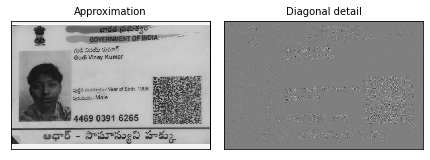

In [165]:
titles = ['Approximation', 'Diagonal detail']
coeffs2 = pywt.dwt2(var[1], 'db2')
LL_G, (LH_G, HL_G, HH_G) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL_G,HH_G]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

LL_G = LL_G.astype(np.uint8)
LL1_G = Image.fromarray(LL_G)
LL1_G.show()

HH_G = HH_G.astype(np.uint8)
HH1_G = Image.fromarray(HH_G)
HH1_G.show()

In [13]:
hG, wG, = LL_G.shape

In [14]:
X_points = start_points(wR, split_width, 0.5)
Y_points = start_points(hR, split_height, 0.5)

count = 0
name = 'splitted'
frmt = 'jpeg'
lG = [[0]*len(X_points)]*len(Y_points)
for n,i in enumerate(Y_points):
    for m,j in enumerate(X_points):
        split = LL_G[i:i+split_height, j:j+split_width]
        lG[n][m] = split
        count += 1

In [15]:
lG[0][0].shape

(16, 16)

In [70]:
np.array(lG).shape

(40, 62, 16, 16)

In [71]:
lG = np.array(lG).reshape((40*62,16,16))

In [72]:
lG.shape

(2480, 16, 16)

In [73]:
lG_2 = []
for i in range(len(lG)):
    lG_2.append(lG[i].flatten()/255.0)

In [74]:
np.array(lG_2).shape

(2480, 256)

In [75]:
lG_2[0]

array([0.36862745, 0.36470588, 0.34509804, 0.34901961, 0.37254902,
       0.36078431, 0.34117647, 0.3372549 , 0.35686275, 0.37647059,
       0.38039216, 0.36862745, 0.36862745, 0.37647059, 0.42745098,
       0.4       , 0.41176471, 0.40784314, 0.38039216, 0.38039216,
       0.40392157, 0.38039216, 0.37647059, 0.38431373, 0.39215686,
       0.37647059, 0.36862745, 0.37254902, 0.38039216, 0.39215686,
       0.41176471, 0.38039216, 0.52156863, 0.51372549, 0.45098039,
       0.39607843, 0.38431373, 0.4       , 0.40392157, 0.4       ,
       0.38823529, 0.36862745, 0.35294118, 0.36862745, 0.39607843,
       0.40784314, 0.41568627, 0.38823529, 0.62745098, 0.61960784,
       0.56862745, 0.52941176, 0.52156863, 0.54901961, 0.54901961,
       0.52156863, 0.49411765, 0.49803922, 0.48235294, 0.50980392,
       0.54901961, 0.52156863, 0.52156863, 0.5254902 , 0.96470588,
       0.96470588, 0.96470588, 0.96470588, 0.96470588, 0.96470588,
       0.96470588, 0.96470588, 0.96862745, 0.98823529, 0.98823

In [76]:
distG = []
for i in range(len(lG_2)):
    if i+1<len(lG_2):
        distG.append([distance.euclidean(lG_2[i],lG_2[i+1]),((i),(i+1))])

In [77]:
distG

[[1.4364508357267949, (0, 1)],
 [1.9830616835861015, (1, 2)],
 [1.4361456811659876, (2, 3)],
 [0.3645582665628895, (3, 4)],
 [0.26507599397837156, (4, 5)],
 [0.15178041161069503, (5, 6)],
 [0.21742613765692712, (6, 7)],
 [0.2138963159732492, (7, 8)],
 [0.11633252528777507, (8, 9)],
 [0.12462940064369184, (9, 10)],
 [0.17214748288351361, (10, 11)],
 [0.3837530924776492, (11, 12)],
 [0.5501109601118825, (12, 13)],
 [0.4338963603427052, (13, 14)],
 [0.24627950538207974, (14, 15)],
 [0.35147845042755577, (15, 16)],
 [0.3072368201694258, (16, 17)],
 [0.24736986333976724, (17, 18)],
 [0.25220290495393777, (18, 19)],
 [0.24244049436978407, (19, 20)],
 [0.4646190040407318, (20, 21)],
 [0.6563093952543386, (21, 22)],
 [0.5088225849097736, (22, 23)],
 [0.14112199384663984, (23, 24)],
 [0.14907119849998593, (24, 25)],
 [0.28349442465769126, (25, 26)],
 [0.32242831044854064, (26, 27)],
 [0.3160210136142083, (27, 28)],
 [0.2813981678574155, (28, 29)],
 [0.2073987109361153, (29, 30)],
 [0.2250037378

In [78]:
len(distG)

2479

In [79]:
distG

[[1.4364508357267949, (0, 1)],
 [1.9830616835861015, (1, 2)],
 [1.4361456811659876, (2, 3)],
 [0.3645582665628895, (3, 4)],
 [0.26507599397837156, (4, 5)],
 [0.15178041161069503, (5, 6)],
 [0.21742613765692712, (6, 7)],
 [0.2138963159732492, (7, 8)],
 [0.11633252528777507, (8, 9)],
 [0.12462940064369184, (9, 10)],
 [0.17214748288351361, (10, 11)],
 [0.3837530924776492, (11, 12)],
 [0.5501109601118825, (12, 13)],
 [0.4338963603427052, (13, 14)],
 [0.24627950538207974, (14, 15)],
 [0.35147845042755577, (15, 16)],
 [0.3072368201694258, (16, 17)],
 [0.24736986333976724, (17, 18)],
 [0.25220290495393777, (18, 19)],
 [0.24244049436978407, (19, 20)],
 [0.4646190040407318, (20, 21)],
 [0.6563093952543386, (21, 22)],
 [0.5088225849097736, (22, 23)],
 [0.14112199384663984, (23, 24)],
 [0.14907119849998593, (24, 25)],
 [0.28349442465769126, (25, 26)],
 [0.32242831044854064, (26, 27)],
 [0.3160210136142083, (27, 28)],
 [0.2813981678574155, (28, 29)],
 [0.2073987109361153, (29, 30)],
 [0.2250037378

In [80]:
a = [distG[i][0] for i in range(len(distG))]

In [81]:
a

[1.4364508357267949,
 1.9830616835861015,
 1.4361456811659876,
 0.3645582665628895,
 0.26507599397837156,
 0.15178041161069503,
 0.21742613765692712,
 0.2138963159732492,
 0.11633252528777507,
 0.12462940064369184,
 0.17214748288351361,
 0.3837530924776492,
 0.5501109601118825,
 0.4338963603427052,
 0.24627950538207974,
 0.35147845042755577,
 0.3072368201694258,
 0.24736986333976724,
 0.25220290495393777,
 0.24244049436978407,
 0.4646190040407318,
 0.6563093952543386,
 0.5088225849097736,
 0.14112199384663984,
 0.14907119849998593,
 0.28349442465769126,
 0.32242831044854064,
 0.3160210136142083,
 0.2813981678574155,
 0.2073987109361153,
 0.22500373784754593,
 0.1927960557377546,
 0.1437135858965388,
 0.14376708062606555,
 1.0144515168533863,
 1.6473295762521472,
 1.6413205362307588,
 1.0138980397010589,
 0.21129213792979132,
 0.1178429741279743,
 0.11972029429391176,
 0.1956465832669243,
 0.1848136732227166,
 0.19572517197596523,
 0.26168942150122154,
 0.23309429179158553,
 0.174057576

In [82]:
max(a)

5.076624707026692

In [83]:
normG = [float(i)/max(a) for i in a]

In [84]:
normG

[0.2829539149779114,
 0.3906260159119686,
 0.2828938052439015,
 0.07181115162172509,
 0.05221500687483808,
 0.029897898775265323,
 0.04282887749334351,
 0.04213356872277551,
 0.02291532898359733,
 0.024549658057486295,
 0.0339098304125652,
 0.07559217287551043,
 0.10836155750305104,
 0.08546945763828821,
 0.04851245061333718,
 0.06923467278191059,
 0.06051990011082976,
 0.04872723071244089,
 0.049679249404600855,
 0.04775623733505762,
 0.0915212431199888,
 0.1292806605038035,
 0.1002285207739502,
 0.027798390070337308,
 0.02936423452646647,
 0.05584309280638749,
 0.06351233921275666,
 0.0622502217224754,
 0.05543016947223315,
 0.04085366220769662,
 0.04432152282915699,
 0.037977212589873036,
 0.028308885172784383,
 0.028319422632733456,
 0.19982795171942822,
 0.32449307784600157,
 0.3233094094899241,
 0.19971892708509562,
 0.04162059441528861,
 0.02321285911973455,
 0.023582656036835598,
 0.03853871313278774,
 0.03640483271629495,
 0.03855419363677933,
 0.051547915515403414,
 0.0459152

In [85]:
for i in range(len(normG)):
    distG[i][0] = normG[i]

In [86]:
distG

[[0.2829539149779114, (0, 1)],
 [0.3906260159119686, (1, 2)],
 [0.2828938052439015, (2, 3)],
 [0.07181115162172509, (3, 4)],
 [0.05221500687483808, (4, 5)],
 [0.029897898775265323, (5, 6)],
 [0.04282887749334351, (6, 7)],
 [0.04213356872277551, (7, 8)],
 [0.02291532898359733, (8, 9)],
 [0.024549658057486295, (9, 10)],
 [0.0339098304125652, (10, 11)],
 [0.07559217287551043, (11, 12)],
 [0.10836155750305104, (12, 13)],
 [0.08546945763828821, (13, 14)],
 [0.04851245061333718, (14, 15)],
 [0.06923467278191059, (15, 16)],
 [0.06051990011082976, (16, 17)],
 [0.04872723071244089, (17, 18)],
 [0.049679249404600855, (18, 19)],
 [0.04775623733505762, (19, 20)],
 [0.0915212431199888, (20, 21)],
 [0.1292806605038035, (21, 22)],
 [0.1002285207739502, (22, 23)],
 [0.027798390070337308, (23, 24)],
 [0.02936423452646647, (24, 25)],
 [0.05584309280638749, (25, 26)],
 [0.06351233921275666, (26, 27)],
 [0.0622502217224754, (27, 28)],
 [0.05543016947223315, (28, 29)],
 [0.04085366220769662, (29, 30)],
 [0

In [87]:
c = 0
for i in range(len(distG)):
    if distG[c][0] > 0.7:
        distG.pop(c)
    else:
        c+=1

In [88]:
distG

[[0.2829539149779114, (0, 1)],
 [0.3906260159119686, (1, 2)],
 [0.2828938052439015, (2, 3)],
 [0.07181115162172509, (3, 4)],
 [0.05221500687483808, (4, 5)],
 [0.029897898775265323, (5, 6)],
 [0.04282887749334351, (6, 7)],
 [0.04213356872277551, (7, 8)],
 [0.02291532898359733, (8, 9)],
 [0.024549658057486295, (9, 10)],
 [0.0339098304125652, (10, 11)],
 [0.07559217287551043, (11, 12)],
 [0.10836155750305104, (12, 13)],
 [0.08546945763828821, (13, 14)],
 [0.04851245061333718, (14, 15)],
 [0.06923467278191059, (15, 16)],
 [0.06051990011082976, (16, 17)],
 [0.04872723071244089, (17, 18)],
 [0.049679249404600855, (18, 19)],
 [0.04775623733505762, (19, 20)],
 [0.0915212431199888, (20, 21)],
 [0.1292806605038035, (21, 22)],
 [0.1002285207739502, (22, 23)],
 [0.027798390070337308, (23, 24)],
 [0.02936423452646647, (24, 25)],
 [0.05584309280638749, (25, 26)],
 [0.06351233921275666, (26, 27)],
 [0.0622502217224754, (27, 28)],
 [0.05543016947223315, (28, 29)],
 [0.04085366220769662, (29, 30)],
 [0

In [89]:
distG.sort(key = lambda x: x[0])

In [90]:
distG

[[0.02291532898359733, (8, 9)],
 [0.02291532898359733, (70, 71)],
 [0.02291532898359733, (132, 133)],
 [0.02291532898359733, (194, 195)],
 [0.02291532898359733, (256, 257)],
 [0.02291532898359733, (318, 319)],
 [0.02291532898359733, (380, 381)],
 [0.02291532898359733, (442, 443)],
 [0.02291532898359733, (504, 505)],
 [0.02291532898359733, (566, 567)],
 [0.02291532898359733, (628, 629)],
 [0.02291532898359733, (690, 691)],
 [0.02291532898359733, (752, 753)],
 [0.02291532898359733, (814, 815)],
 [0.02291532898359733, (876, 877)],
 [0.02291532898359733, (938, 939)],
 [0.02291532898359733, (1000, 1001)],
 [0.02291532898359733, (1062, 1063)],
 [0.02291532898359733, (1124, 1125)],
 [0.02291532898359733, (1186, 1187)],
 [0.02291532898359733, (1248, 1249)],
 [0.02291532898359733, (1310, 1311)],
 [0.02291532898359733, (1372, 1373)],
 [0.02291532898359733, (1434, 1435)],
 [0.02291532898359733, (1496, 1497)],
 [0.02291532898359733, (1558, 1559)],
 [0.02291532898359733, (1620, 1621)],
 [0.02291532

In [91]:
hRG, wRG = HH_G.shape

In [92]:
HH_G

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [93]:
X_points = start_points(wRG, split_width, 0.5)
Y_points = start_points(hRG, split_height, 0.5)

count = 0
name = 'splitted'
frmt = 'jpeg'
HG = [[0]*len(X_points)]*len(Y_points)
for n,i in enumerate(Y_points):
    for m,j in enumerate(X_points):
        split = HH_G[i:i+split_height, j:j+split_width]
        HG[n][m] = split

In [94]:
len(HG[0][0].flatten())

256

In [95]:
np.array(HG).shape

(40, 62, 16, 16)

In [96]:
HG = np.array(HG).reshape((40*62,16,16))

In [97]:
HG.shape

(2480, 16, 16)

In [98]:
HG

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  1,   0,   0, ...,   0,   0,   0],
        [255,   0,   1, ...,   0,   0,   0],
        [  1,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [99]:
HG_2 = []
for i in range(len(HG)):
    HG_2.append(HG[i].flatten()/255.0)

In [100]:
HG_2[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [101]:
np.array(HR_2).shape

(2480, 256)

In [102]:
dist2G = []
for i in range(len(HG_2)):
    if i+1<len(HG_2):
        dist2G.append([distance.euclidean(HG_2[i],HG_2[i+1]),((i),(i+1))])

In [103]:
dist2G

[[1.7320774440546816, (0, 1)],
 [2.6442948532736654, (1, 2)],
 [2.2343272762840938, (2, 3)],
 [1.0, (3, 4)],
 [0.0, (4, 5)],
 [0.0, (5, 6)],
 [0.0, (6, 7)],
 [0.0, (7, 8)],
 [0.0, (8, 9)],
 [0.0, (9, 10)],
 [0.0, (10, 11)],
 [0.0, (11, 12)],
 [0.0, (12, 13)],
 [0.0, (13, 14)],
 [0.0, (14, 15)],
 [0.0, (15, 16)],
 [0.0, (16, 17)],
 [0.0, (17, 18)],
 [0.0, (18, 19)],
 [0.0, (19, 20)],
 [0.0, (20, 21)],
 [0.0, (21, 22)],
 [0.0, (22, 23)],
 [0.0, (23, 24)],
 [0.0, (24, 25)],
 [0.00392156862745098, (25, 26)],
 [1.0000153785822494, (26, 27)],
 [1.4142189995543475, (27, 28)],
 [1.0, (28, 29)],
 [0.0, (29, 30)],
 [0.0, (30, 31)],
 [0.0, (31, 32)],
 [0.0, (32, 33)],
 [0.0, (33, 34)],
 [1.732064125862983, (34, 35)],
 [3.7333230350821878, (35, 36)],
 [4.349979561305486, (36, 37)],
 [2.8257153847480274, (37, 38)],
 [0.0, (38, 39)],
 [0.0, (39, 40)],
 [0.0, (40, 41)],
 [0.0, (41, 42)],
 [0.0, (42, 43)],
 [0.0, (43, 44)],
 [1.0, (44, 45)],
 [1.7320508075688772, (45, 46)],
 [1.7320508075688772, (46, 

In [104]:
b = [dist2G[i][0] for i in range(len(dist2G))]

In [105]:
b

[1.7320774440546816,
 2.6442948532736654,
 2.2343272762840938,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00392156862745098,
 1.0000153785822494,
 1.4142189995543475,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.732064125862983,
 3.7333230350821878,
 4.349979561305486,
 2.8257153847480274,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.7320508075688772,
 1.7320508075688772,
 1.000007689320687,
 1.9903148810286233,
 2.9857742941040546,
 2.439981595911961,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9686274509803922,
 0.9686353893458941,
 1.7320774440546816,
 2.6442948532736654,
 2.2343272762840938,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00392156862745098,
 1.0000153785822494,
 1.4142189995543475,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.732064125862983,
 3.7333230350821878,
 4.349979561305486,
 2.82

In [106]:
max(b)

4.349979561305486

In [107]:
norm2G = [float(i)/max(b) for i in b]

In [108]:
norm2G

[0.3981805936428038,
 0.6078867305022642,
 0.5136408676857191,
 0.22988613760288265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009015142651093437,
 0.22988967292575777,
 0.32510934353216175,
 0.22988613760288265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3981775319751543,
 0.8582392129589153,
 1.0,
 0.6495927957647675,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.22988613760288265,
 0.3981744702839629,
 0.3981744702839629,
 0.2298879052711162,
 0.4575458006132111,
 0.6863881202255545,
 0.5609179449063183,
 0.22988613760288265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2226740234820079,
 0.222675848402192,
 0.3981805936428038,
 0.6078867305022642,
 0.5136408676857191,
 0.22988613760288265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009015142651093437,
 0.22988967292575777,
 0.32510934353216175,
 0.22988613760288265,
 0.0

In [109]:
for i in range(len(norm2G)):
    dist2G[i][0] = norm2G[i]

In [110]:
dist2G

[[0.3981805936428038, (0, 1)],
 [0.6078867305022642, (1, 2)],
 [0.5136408676857191, (2, 3)],
 [0.22988613760288265, (3, 4)],
 [0.0, (4, 5)],
 [0.0, (5, 6)],
 [0.0, (6, 7)],
 [0.0, (7, 8)],
 [0.0, (8, 9)],
 [0.0, (9, 10)],
 [0.0, (10, 11)],
 [0.0, (11, 12)],
 [0.0, (12, 13)],
 [0.0, (13, 14)],
 [0.0, (14, 15)],
 [0.0, (15, 16)],
 [0.0, (16, 17)],
 [0.0, (17, 18)],
 [0.0, (18, 19)],
 [0.0, (19, 20)],
 [0.0, (20, 21)],
 [0.0, (21, 22)],
 [0.0, (22, 23)],
 [0.0, (23, 24)],
 [0.0, (24, 25)],
 [0.0009015142651093437, (25, 26)],
 [0.22988967292575777, (26, 27)],
 [0.32510934353216175, (27, 28)],
 [0.22988613760288265, (28, 29)],
 [0.0, (29, 30)],
 [0.0, (30, 31)],
 [0.0, (31, 32)],
 [0.0, (32, 33)],
 [0.0, (33, 34)],
 [0.3981775319751543, (34, 35)],
 [0.8582392129589153, (35, 36)],
 [1.0, (36, 37)],
 [0.6495927957647675, (37, 38)],
 [0.0, (38, 39)],
 [0.0, (39, 40)],
 [0.0, (40, 41)],
 [0.0, (41, 42)],
 [0.0, (42, 43)],
 [0.0, (43, 44)],
 [0.22988613760288265, (44, 45)],
 [0.3981744702839629,

In [111]:
c = 0
for i in range(len(dist2G)):
    if dist2G[c][0] < 0.3:
        dist2G.pop(c)
    else:
        c+=1

In [112]:
dist2G

[[0.3981805936428038, (0, 1)],
 [0.6078867305022642, (1, 2)],
 [0.5136408676857191, (2, 3)],
 [0.32510934353216175, (27, 28)],
 [0.3981775319751543, (34, 35)],
 [0.8582392129589153, (35, 36)],
 [1.0, (36, 37)],
 [0.6495927957647675, (37, 38)],
 [0.3981744702839629, (45, 46)],
 [0.3981744702839629, (46, 47)],
 [0.4575458006132111, (48, 49)],
 [0.6863881202255545, (49, 50)],
 [0.5609179449063183, (50, 51)],
 [0.3981805936428038, (62, 63)],
 [0.6078867305022642, (63, 64)],
 [0.5136408676857191, (64, 65)],
 [0.32510934353216175, (89, 90)],
 [0.3981775319751543, (96, 97)],
 [0.8582392129589153, (97, 98)],
 [1.0, (98, 99)],
 [0.6495927957647675, (99, 100)],
 [0.3981744702839629, (107, 108)],
 [0.3981744702839629, (108, 109)],
 [0.4575458006132111, (110, 111)],
 [0.6863881202255545, (111, 112)],
 [0.5609179449063183, (112, 113)],
 [0.3981805936428038, (124, 125)],
 [0.6078867305022642, (125, 126)],
 [0.5136408676857191, (126, 127)],
 [0.32510934353216175, (151, 152)],
 [0.3981775319751543, (1

In [113]:
dist2G.sort(key = lambda x: x[0], reverse = True)

In [114]:
dist2G

[[1.0, (36, 37)],
 [1.0, (98, 99)],
 [1.0, (160, 161)],
 [1.0, (222, 223)],
 [1.0, (284, 285)],
 [1.0, (346, 347)],
 [1.0, (408, 409)],
 [1.0, (470, 471)],
 [1.0, (532, 533)],
 [1.0, (594, 595)],
 [1.0, (656, 657)],
 [1.0, (718, 719)],
 [1.0, (780, 781)],
 [1.0, (842, 843)],
 [1.0, (904, 905)],
 [1.0, (966, 967)],
 [1.0, (1028, 1029)],
 [1.0, (1090, 1091)],
 [1.0, (1152, 1153)],
 [1.0, (1214, 1215)],
 [1.0, (1276, 1277)],
 [1.0, (1338, 1339)],
 [1.0, (1400, 1401)],
 [1.0, (1462, 1463)],
 [1.0, (1524, 1525)],
 [1.0, (1586, 1587)],
 [1.0, (1648, 1649)],
 [1.0, (1710, 1711)],
 [1.0, (1772, 1773)],
 [1.0, (1834, 1835)],
 [1.0, (1896, 1897)],
 [1.0, (1958, 1959)],
 [1.0, (2020, 2021)],
 [1.0, (2082, 2083)],
 [1.0, (2144, 2145)],
 [1.0, (2206, 2207)],
 [1.0, (2268, 2269)],
 [1.0, (2330, 2331)],
 [1.0, (2392, 2393)],
 [1.0, (2454, 2455)],
 [0.8582392129589153, (35, 36)],
 [0.8582392129589153, (97, 98)],
 [0.8582392129589153, (159, 160)],
 [0.8582392129589153, (221, 222)],
 [0.8582392129589153

In [115]:
cl = []
for i in range(len(dist2G)):
    if i-7>=0 and i+7<=len(dist2G): 
        if dist2G[i][1] in [j[1] for j in distG[i-7:i+7]]:
            cl.append(dist2G[i][1])
    elif i-7<0:
        if dist2G[i][1] in [j[1] for j in distG[:i+7]]:
            cl.append(dist2G[i][1])
    else:
        if dist2G[i][1] in [j[1] for j in distG[i-7:]]:
            cl.append(dist2G[i][1])

In [116]:
cl

[(2135, 2136),
 (2197, 2198),
 (2259, 2260),
 (2321, 2322),
 (2383, 2384),
 (2445, 2446)]

# Blue

### Repeating the same process for the blue part of the image


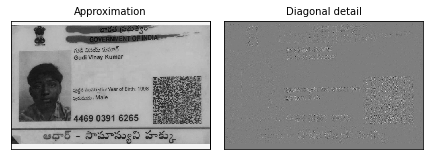

In [166]:
titles = ['Approximation', 'Diagonal detail']
coeffs2 = pywt.dwt2(var[2], 'db2')
LL_B, (LH_B, HL_B, HH_B) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL_B,HH_B]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

LL_B = LL_B.astype(np.uint8)
LL1_B = Image.fromarray(LL_B)
LL1_B.show()

HH_B = HH_B.astype(np.uint8)
HH1_B = Image.fromarray(HH_B)
HH1_B.show()

In [16]:
hB, wB, = LL_B.shape

In [17]:
X_points = start_points(wR, split_width, 0.5)
Y_points = start_points(hR, split_height, 0.5)

count = 0
name = 'splitted'
frmt = 'jpeg'
lB = [[0]*len(X_points)]*len(Y_points)
for n,i in enumerate(Y_points):
    for m,j in enumerate(X_points):
        split = LL_B[i:i+split_height, j:j+split_width]
        lB[n][m] = split
        count += 1

In [117]:
np.array(lB).shape

(40, 62, 16, 16)

In [118]:
lB = np.array(lB).reshape((40*62,16,16))

In [119]:
lB.shape

(2480, 16, 16)

In [120]:
lB_2 = []
for i in range(len(lB)):
    lB_2.append(lB[i].flatten()/255.0)

In [121]:
np.array(lB_2).shape

(2480, 256)

In [122]:
lB_2[0]

array([0.41960784, 0.41568627, 0.39607843, 0.40392157, 0.42352941,
       0.41176471, 0.39215686, 0.38823529, 0.40392157, 0.41568627,
       0.40784314, 0.38823529, 0.37254902, 0.36470588, 0.39607843,
       0.36078431, 0.45882353, 0.45490196, 0.42745098, 0.42745098,
       0.45098039, 0.42745098, 0.42352941, 0.43137255, 0.43921569,
       0.40392157, 0.39607843, 0.38431373, 0.38823529, 0.38431373,
       0.39607843, 0.35294118, 0.54901961, 0.5372549 , 0.4745098 ,
       0.41960784, 0.41176471, 0.42352941, 0.43137255, 0.42745098,
       0.41176471, 0.37647059, 0.36078431, 0.37647059, 0.39607843,
       0.4       , 0.4       , 0.37254902, 0.63529412, 0.62745098,
       0.57647059, 0.5372549 , 0.52941176, 0.55686275, 0.55686275,
       0.52941176, 0.50196078, 0.49803922, 0.48235294, 0.50588235,
       0.54117647, 0.50980392, 0.50980392, 0.50980392, 0.97254902,
       0.97254902, 0.97254902, 0.97254902, 0.97254902, 0.97254902,
       0.97254902, 0.97254902, 0.97647059, 0.98823529, 0.98823

In [123]:
distB = []
for i in range(len(lB_2)):
    if i+1<len(lB_2):
        distB.append([distance.euclidean(lB_2[i],lB_2[i+1]),((i),(i+1))])

In [124]:
distB

[[1.41049507179523, (0, 1)],
 [1.9468248185902919, (1, 2)],
 [1.4195428432741335, (2, 3)],
 [0.35504817700831004, (3, 4)],
 [0.2643207074192764, (4, 5)],
 [0.15409319768147847, (5, 6)],
 [0.1620704181942888, (6, 7)],
 [0.16278053004327261, (7, 8)],
 [0.12542890660172143, (8, 9)],
 [0.18522926554697322, (9, 10)],
 [0.24474484355497922, (10, 11)],
 [0.5018995060635657, (11, 12)],
 [0.6912647697735123, (12, 13)],
 [0.5160402870461485, (13, 14)],
 [0.24250391896063225, (14, 15)],
 [0.3543327685671064, (15, 16)],
 [0.3039152434509421, (16, 17)],
 [0.21880103897354228, (17, 18)],
 [0.22520869043703887, (18, 19)],
 [0.24030609725260438, (19, 20)],
 [0.4668478804528041, (20, 21)],
 [0.658835200643586, (21, 22)],
 [0.5101507116120165, (22, 23)],
 [0.1373669010834274, (23, 24)],
 [0.14756774684099433, (24, 25)],
 [0.23206940589040764, (25, 26)],
 [0.2864624685137203, (26, 27)],
 [0.32765638737732244, (27, 28)],
 [0.2992236526578084, (28, 29)],
 [0.2210735402267514, (29, 30)],
 [0.219502775986769

In [125]:
len(distB)

2479

In [126]:
a = [distB[i][0] for i in range(len(distB))]

In [127]:
a

[1.41049507179523,
 1.9468248185902919,
 1.4195428432741335,
 0.35504817700831004,
 0.2643207074192764,
 0.15409319768147847,
 0.1620704181942888,
 0.16278053004327261,
 0.12542890660172143,
 0.18522926554697322,
 0.24474484355497922,
 0.5018995060635657,
 0.6912647697735123,
 0.5160402870461485,
 0.24250391896063225,
 0.3543327685671064,
 0.3039152434509421,
 0.21880103897354228,
 0.22520869043703887,
 0.24030609725260438,
 0.4668478804528041,
 0.658835200643586,
 0.5101507116120165,
 0.1373669010834274,
 0.14756774684099433,
 0.23206940589040764,
 0.2864624685137203,
 0.32765638737732244,
 0.2992236526578084,
 0.2210735402267514,
 0.21950277598676904,
 0.2105265181406987,
 0.17759987253685094,
 0.1423156651892083,
 1.1064454136048454,
 1.9374692268518945,
 1.8726876039468416,
 0.9998615821157464,
 0.20605968086932785,
 0.10888975197580253,
 0.11849368572343628,
 0.21532947314968381,
 0.210782033731399,
 0.19406812598680184,
 0.253389176143531,
 0.2174615001256748,
 0.1845222016630366

In [128]:
max(a)

5.201775640999934

In [129]:
normB = [float(i)/max(a) for i in a]

In [130]:
normB

[0.27115646062814264,
 0.3742615893014669,
 0.27289582274280016,
 0.06825518851867655,
 0.05081355399797024,
 0.029623191832213902,
 0.03115674903716803,
 0.0312932623929896,
 0.02411270982414196,
 0.03560885327060487,
 0.047050249846595095,
 0.09648618869826649,
 0.13289015472428775,
 0.09920464138798389,
 0.046619449914225036,
 0.06811765693512173,
 0.05842528867556478,
 0.04206275973322877,
 0.04329457977040839,
 0.04619693616897527,
 0.08974779242171665,
 0.12665582795434419,
 0.0980724173474638,
 0.02640769432666678,
 0.028368725801604832,
 0.04461349775666163,
 0.055070131486611724,
 0.06298933479459666,
 0.057523367655335646,
 0.042499630027152534,
 0.04219766309347671,
 0.04047204890602112,
 0.03414216313695357,
 0.027359054871088414,
 0.2127053317878497,
 0.3724630511898541,
 0.3600092993604884,
 0.19221543778915148,
 0.03961333496300451,
 0.020933188874495696,
 0.022779468762450957,
 0.04139537881112673,
 0.04052116974635233,
 0.03730805389935969,
 0.048712054042919506,
 0.04

In [131]:
for i in range(len(normB)):
    distB[i][0] = normB[i]

In [132]:
distB

[[0.27115646062814264, (0, 1)],
 [0.3742615893014669, (1, 2)],
 [0.27289582274280016, (2, 3)],
 [0.06825518851867655, (3, 4)],
 [0.05081355399797024, (4, 5)],
 [0.029623191832213902, (5, 6)],
 [0.03115674903716803, (6, 7)],
 [0.0312932623929896, (7, 8)],
 [0.02411270982414196, (8, 9)],
 [0.03560885327060487, (9, 10)],
 [0.047050249846595095, (10, 11)],
 [0.09648618869826649, (11, 12)],
 [0.13289015472428775, (12, 13)],
 [0.09920464138798389, (13, 14)],
 [0.046619449914225036, (14, 15)],
 [0.06811765693512173, (15, 16)],
 [0.05842528867556478, (16, 17)],
 [0.04206275973322877, (17, 18)],
 [0.04329457977040839, (18, 19)],
 [0.04619693616897527, (19, 20)],
 [0.08974779242171665, (20, 21)],
 [0.12665582795434419, (21, 22)],
 [0.0980724173474638, (22, 23)],
 [0.02640769432666678, (23, 24)],
 [0.028368725801604832, (24, 25)],
 [0.04461349775666163, (25, 26)],
 [0.055070131486611724, (26, 27)],
 [0.06298933479459666, (27, 28)],
 [0.057523367655335646, (28, 29)],
 [0.042499630027152534, (29, 3

In [133]:
c = 0
for i in range(len(distB)):
    if distB[c][0] > 0.7:
        distB.pop(c)
    else:
        c+=1

In [134]:
distB.sort(key = lambda x: x[0])

In [135]:
distB

[[0.020933188874495696, (39, 40)],
 [0.020933188874495696, (101, 102)],
 [0.020933188874495696, (163, 164)],
 [0.020933188874495696, (225, 226)],
 [0.020933188874495696, (287, 288)],
 [0.020933188874495696, (349, 350)],
 [0.020933188874495696, (411, 412)],
 [0.020933188874495696, (473, 474)],
 [0.020933188874495696, (535, 536)],
 [0.020933188874495696, (597, 598)],
 [0.020933188874495696, (659, 660)],
 [0.020933188874495696, (721, 722)],
 [0.020933188874495696, (783, 784)],
 [0.020933188874495696, (845, 846)],
 [0.020933188874495696, (907, 908)],
 [0.020933188874495696, (969, 970)],
 [0.020933188874495696, (1031, 1032)],
 [0.020933188874495696, (1093, 1094)],
 [0.020933188874495696, (1155, 1156)],
 [0.020933188874495696, (1217, 1218)],
 [0.020933188874495696, (1279, 1280)],
 [0.020933188874495696, (1341, 1342)],
 [0.020933188874495696, (1403, 1404)],
 [0.020933188874495696, (1465, 1466)],
 [0.020933188874495696, (1527, 1528)],
 [0.020933188874495696, (1589, 1590)],
 [0.0209331888744956

In [136]:
len(distB)

2400

In [137]:
hRB, wRB = HH_B.shape

In [138]:
X_points = start_points(wRB, split_width, 0.5)
Y_points = start_points(hRB, split_height, 0.5)

count = 0
name = 'splitted'
frmt = 'jpeg'
HB = [[0]*len(X_points)]*len(Y_points)
for n,i in enumerate(Y_points):
    for m,j in enumerate(X_points):
        split = HH_B[i:i+split_height, j:j+split_width]
        HB[n][m] = split

In [139]:
len(HB[0][0].flatten())

256

In [140]:
np.array(HB).shape

(40, 62, 16, 16)

In [141]:
HB = np.array(HB).reshape((40*62,16,16))

In [142]:
HB.shape

(2480, 16, 16)

In [143]:
HB_2 = []
for i in range(len(HB)):
    HB_2.append(HB[i].flatten()/255.0)

In [144]:
HB_2[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [145]:
np.array(HB_2).shape

(2480, 256)

In [146]:
dist2B = []
for i in range(len(HB_2)):
    if i+1<len(HB_2):
        dist2B.append([distance.euclidean(HB_2[i],HB_2[i+1]),((i),(i+1))])

In [147]:
dist2B

[[1.9960976924221907, (0, 1)],
 [2.9947897854916112, (1, 2)],
 [2.446298272961046, (2, 3)],
 [1.0, (3, 4)],
 [0.0, (4, 5)],
 [0.0, (5, 6)],
 [0.0, (6, 7)],
 [0.0, (7, 8)],
 [0.0, (8, 9)],
 [0.0, (9, 10)],
 [0.0, (10, 11)],
 [0.0, (11, 12)],
 [0.0, (12, 13)],
 [0.0, (13, 14)],
 [0.0, (14, 15)],
 [0.0, (15, 16)],
 [0.0, (16, 17)],
 [0.0, (17, 18)],
 [0.0, (18, 19)],
 [0.0, (19, 20)],
 [0.0, (20, 21)],
 [0.0, (21, 22)],
 [0.0, (22, 23)],
 [0.0, (23, 24)],
 [0.0, (24, 25)],
 [0.00392156862745098, (25, 26)],
 [1.0000153785822494, (26, 27)],
 [1.4142189995543475, (27, 28)],
 [1.0, (28, 29)],
 [0.0, (29, 30)],
 [0.0, (30, 31)],
 [0.0, (31, 32)],
 [0.0, (32, 33)],
 [0.0, (33, 34)],
 [1.732064125862983, (34, 35)],
 [3.7333230350821878, (35, 36)],
 [4.349979561305486, (36, 37)],
 [2.8257153847480274, (37, 38)],
 [0.0, (38, 39)],
 [0.0, (39, 40)],
 [0.0, (40, 41)],
 [0.0, (41, 42)],
 [0.0, (42, 43)],
 [0.0, (43, 44)],
 [1.0, (44, 45)],
 [1.7320508075688772, (45, 46)],
 [1.7320508075688772, (46, 4

In [148]:
b = [dist2B[i][0] for i in range(len(dist2B))]

In [149]:
b

[1.9960976924221907,
 2.9947897854916112,
 2.446298272961046,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00392156862745098,
 1.0000153785822494,
 1.4142189995543475,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.732064125862983,
 3.7333230350821878,
 4.349979561305486,
 2.8257153847480274,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.7320508075688772,
 1.7320508075688772,
 1.000007689320687,
 1.9903148810286233,
 2.9857742941040546,
 2.439981595911961,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.9647058823529412,
 0.9647138529879555,
 1.9960976924221907,
 2.9947897854916112,
 2.446298272961046,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00392156862745098,
 1.0000153785822494,
 1.4142189995543475,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.732064125862983,
 3.7333230350821878,
 4.349979561305486,
 2.8257

In [150]:
norm2B = [float(i)/max(b) for i in b]

In [151]:
norm2B

[0.4588751887889642,
 0.688460656719232,
 0.5623700613956172,
 0.22988613760288265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009015142651093437,
 0.22988967292575777,
 0.32510934353216175,
 0.22988613760288265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3981775319751543,
 0.8582392129589153,
 1.0,
 0.6495927957647675,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.22988613760288265,
 0.3981744702839629,
 0.3981744702839629,
 0.2298879052711162,
 0.4575458006132111,
 0.6863881202255545,
 0.5609179449063183,
 0.22988613760288265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.22177250921689856,
 0.22177434155539624,
 0.4588751887889642,
 0.688460656719232,
 0.5623700613956172,
 0.22988613760288265,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0009015142651093437,
 0.22988967292575777,
 0.32510934353216175,
 0.22988613760288265,
 0.

In [152]:
for i in range(len(norm2B)):
    dist2B[i][0] = norm2B[i]

In [153]:
c = 0
for i in range(len(dist2B)):
    if dist2B[c][0] < 0.3:
        dist2B.pop(c)
    else:
        c+=1

In [154]:
dist2B

[[0.4588751887889642, (0, 1)],
 [0.688460656719232, (1, 2)],
 [0.5623700613956172, (2, 3)],
 [0.32510934353216175, (27, 28)],
 [0.3981775319751543, (34, 35)],
 [0.8582392129589153, (35, 36)],
 [1.0, (36, 37)],
 [0.6495927957647675, (37, 38)],
 [0.3981744702839629, (45, 46)],
 [0.3981744702839629, (46, 47)],
 [0.4575458006132111, (48, 49)],
 [0.6863881202255545, (49, 50)],
 [0.5609179449063183, (50, 51)],
 [0.4588751887889642, (62, 63)],
 [0.688460656719232, (63, 64)],
 [0.5623700613956172, (64, 65)],
 [0.32510934353216175, (89, 90)],
 [0.3981775319751543, (96, 97)],
 [0.8582392129589153, (97, 98)],
 [1.0, (98, 99)],
 [0.6495927957647675, (99, 100)],
 [0.3981744702839629, (107, 108)],
 [0.3981744702839629, (108, 109)],
 [0.4575458006132111, (110, 111)],
 [0.6863881202255545, (111, 112)],
 [0.5609179449063183, (112, 113)],
 [0.4588751887889642, (124, 125)],
 [0.688460656719232, (125, 126)],
 [0.5623700613956172, (126, 127)],
 [0.32510934353216175, (151, 152)],
 [0.3981775319751543, (158,

In [155]:
dist2B.sort(key = lambda x: x[0], reverse = True)

In [156]:
dist2B

[[1.0, (36, 37)],
 [1.0, (98, 99)],
 [1.0, (160, 161)],
 [1.0, (222, 223)],
 [1.0, (284, 285)],
 [1.0, (346, 347)],
 [1.0, (408, 409)],
 [1.0, (470, 471)],
 [1.0, (532, 533)],
 [1.0, (594, 595)],
 [1.0, (656, 657)],
 [1.0, (718, 719)],
 [1.0, (780, 781)],
 [1.0, (842, 843)],
 [1.0, (904, 905)],
 [1.0, (966, 967)],
 [1.0, (1028, 1029)],
 [1.0, (1090, 1091)],
 [1.0, (1152, 1153)],
 [1.0, (1214, 1215)],
 [1.0, (1276, 1277)],
 [1.0, (1338, 1339)],
 [1.0, (1400, 1401)],
 [1.0, (1462, 1463)],
 [1.0, (1524, 1525)],
 [1.0, (1586, 1587)],
 [1.0, (1648, 1649)],
 [1.0, (1710, 1711)],
 [1.0, (1772, 1773)],
 [1.0, (1834, 1835)],
 [1.0, (1896, 1897)],
 [1.0, (1958, 1959)],
 [1.0, (2020, 2021)],
 [1.0, (2082, 2083)],
 [1.0, (2144, 2145)],
 [1.0, (2206, 2207)],
 [1.0, (2268, 2269)],
 [1.0, (2330, 2331)],
 [1.0, (2392, 2393)],
 [1.0, (2454, 2455)],
 [0.8582392129589153, (35, 36)],
 [0.8582392129589153, (97, 98)],
 [0.8582392129589153, (159, 160)],
 [0.8582392129589153, (221, 222)],
 [0.8582392129589153

In [157]:
cl = []
for i in range(len(dist2B)):
    if i-7>=0 and i+7<=len(dist2B): 
        if dist2B[i][1] in [j[1] for j in distB[i-7:i+7]]:
            cl.append(dist2B[i][1])
    elif i-7<0:
        if dist2B[i][1] in [j[1] for j in distB[:i+7]]:
            cl.append(dist2B[i][1])
    else:
        if dist2B[i][1] in [j[1] for j in distB[i-7:]]:
            cl.append(dist2B[i][1])

In [164]:
cl

[(2135, 2136),
 (2197, 2198),
 (2259, 2260),
 (2321, 2322),
 (2383, 2384),
 (2445, 2446)]